# Prognoza cen samochodów na Białorusi

Celem tego projektu jest przewidzenie ceny samochodu na Białorusi poprzez analizę takich cech samochodu, jak marka, rok, silnik, rodzaj paliwa, skrzynia biegów, przebieg, jednostka napędowa, kolor i segment. Projekt ma również na celu ustalenie zestawu zmiennych, które mają największy wpływ na cenę samochodu.

Zestaw danych pochodzi z kaggle. Ma 56244 wierszy i 12 kolumn.

## Słownik danych
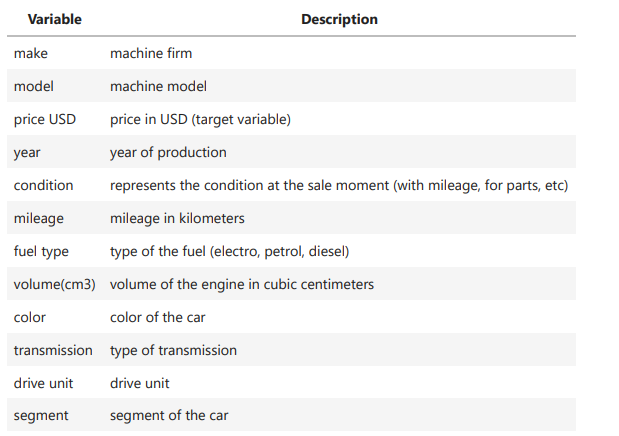


In [4]:
#Załadownanie bibliotek
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Załadowanie zestawu danych
cars = pd.read_csv('cars.csv')
cars.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [6]:
#Sprawdzenie kształtu zesestawu danych
cars.shape

(56244, 12)

In [7]:
#Sprawdzenie typów danych w kolumnach
cars.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [8]:
#wyrzucenie kolumn, które są nie potrzebne do analizy
cars.drop(columns = ['model','segment'], inplace=True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   priceUSD             56244 non-null  int64  
 2   year                 56244 non-null  int64  
 3   condition            56244 non-null  object 
 4   mileage(kilometers)  56244 non-null  float64
 5   fuel_type            56244 non-null  object 
 6   volume(cm3)          56197 non-null  float64
 7   color                56244 non-null  object 
 8   transmission         56244 non-null  object 
 9   drive_unit           54339 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.3+ MB


In [10]:
cars.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [11]:
cars.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [12]:
#Unikalna marka samochodu
cars['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Ponieważ istnieje wiele marek samochodów i trudno jest analizować je indywidualnie, więc pogrupuję je w kategorie: Luxury European, Mainstream European, Russian/Eastern European, Asian, American, Specialty i inne. Grupowanie opiera się na marce samochodu i kraju pochodzenia.

In [14]:
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'


cars['make_segment']=cars['make'].apply(car_make)

In [15]:
cars.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


## Exploratory Data Analysis

W analizie danych eksploracyjnych przeanalizuję związek między zmienną docelową i zmiennymi niezależnymi. Przeanalizuję również związek między zmiennymi niezależnymi. Pomoże mi to lepiej zrozumieć dane i znaleźć zmienne, które mają największy wpływ na zmienną docelową.

### Segment marki samochodu

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

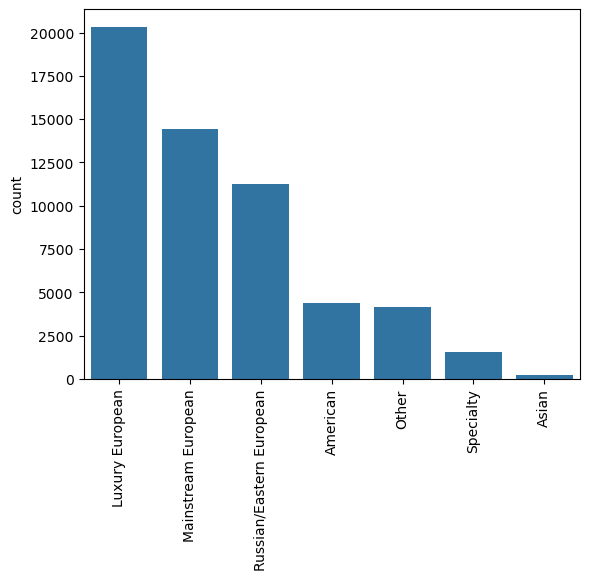

In [18]:
sns.barplot(x=cars['make_segment'].unique(),y=cars['make_segment'].value_counts())
plt.xticks(rotation=90)

W zbiorze danych większość samochodów jest europejska (w szczególności większość to samochody luksusowe, a następnie popularne i rosyjskie/wschodnioeuropejskie). Jednak zbiór danych zawiera również samochody amerykańskie i azjatyckie. Są też samochody specjalistyczne, takie jak Tesla, McLaren,
Bentley itp. Zbiór danych zawiera również samochody, które nie są sklasyfikowane w żadnej z powyższych kategorii.

### Rozkład zmiennej kategorycznej

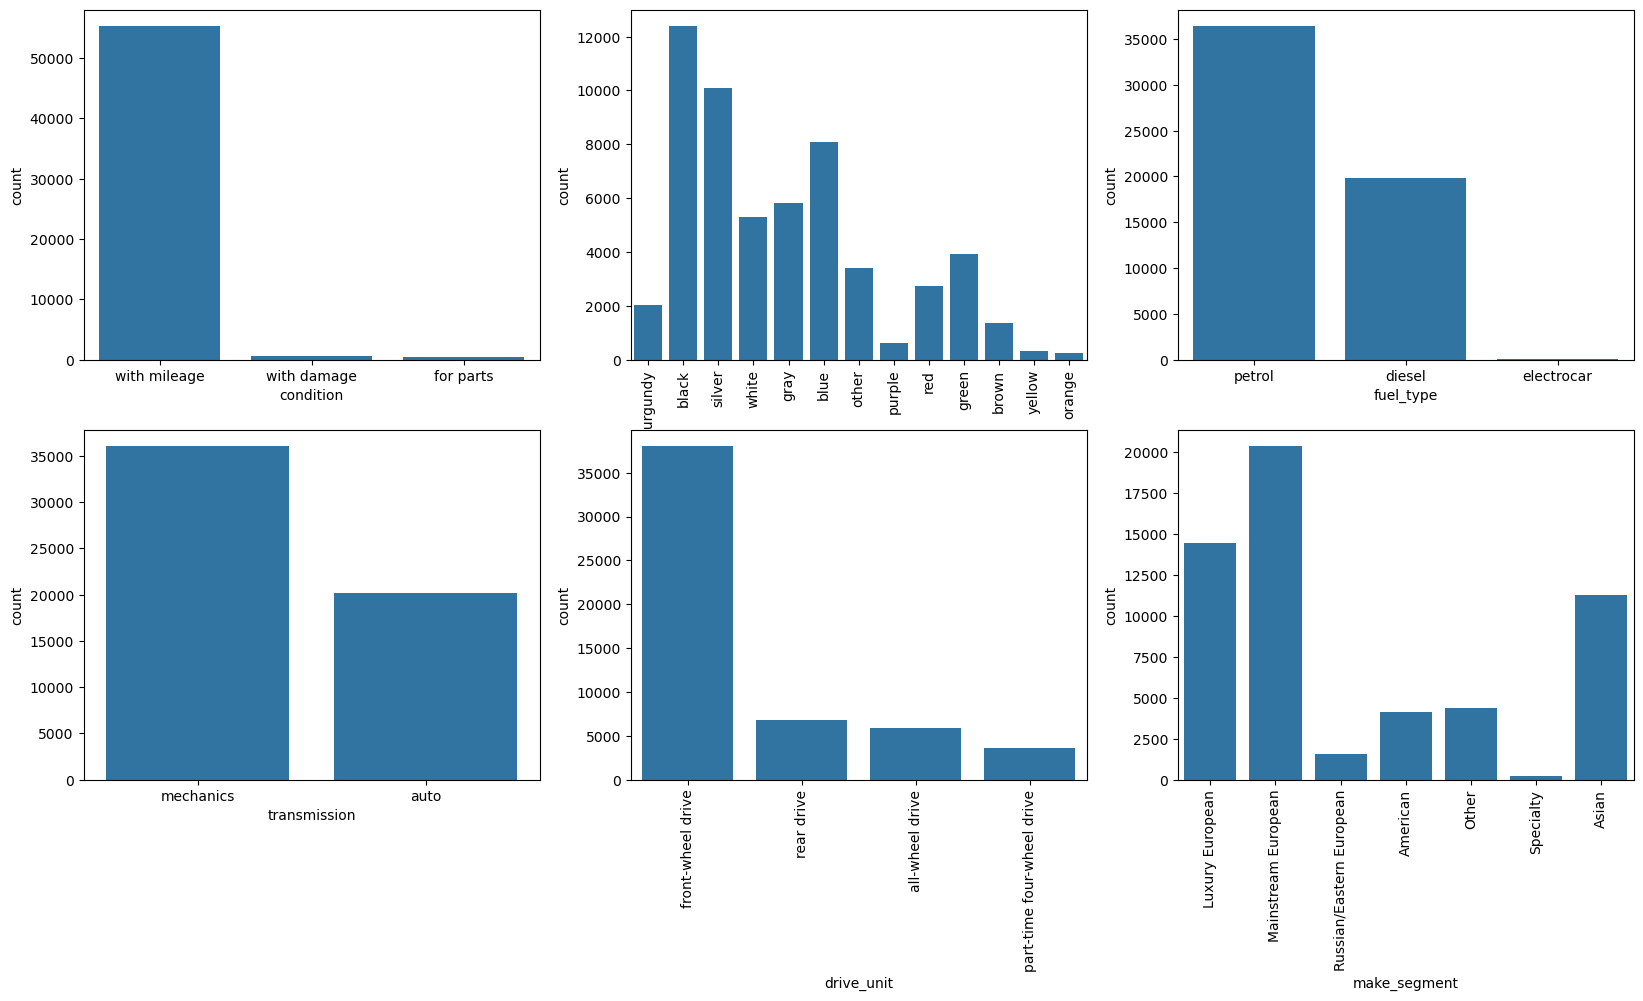

In [21]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=cars, ax=ax[0,0])
sns.countplot(x='color',data=cars,ax=ax[0,1])
ax[0,1].tick_params(axis='x', rotation=90)
sns.countplot(x='fuel_type',data=cars,ax=ax[0,2])
sns.countplot(x='transmission',data=cars,ax=ax[1,0])
sns.countplot(x='drive_unit',data=cars,ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment',data=cars,ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)



Z powyższych wykresów możemy uzyskać przegląd danych dotyczących zmiennych kategorycznych w zestawie danych. Z powyższych wykresów jasno wynika, że ​​większość sprzedawanych samochodów jest w stanie roboczym, większość z nich jeździ na benzynie, następnie na oleju napędowym i prawie żaden z nich nie jeździ na prądzie. Większość samochodów ma manualną skrzynię biegów, napęd na przednie koła, w kolorach takich jak czarny, srebrny, niebieski, biały i szary.

### Rozkład zmiennej ciągłej

<Axes: xlabel='volume(cm3)', ylabel='Count'>

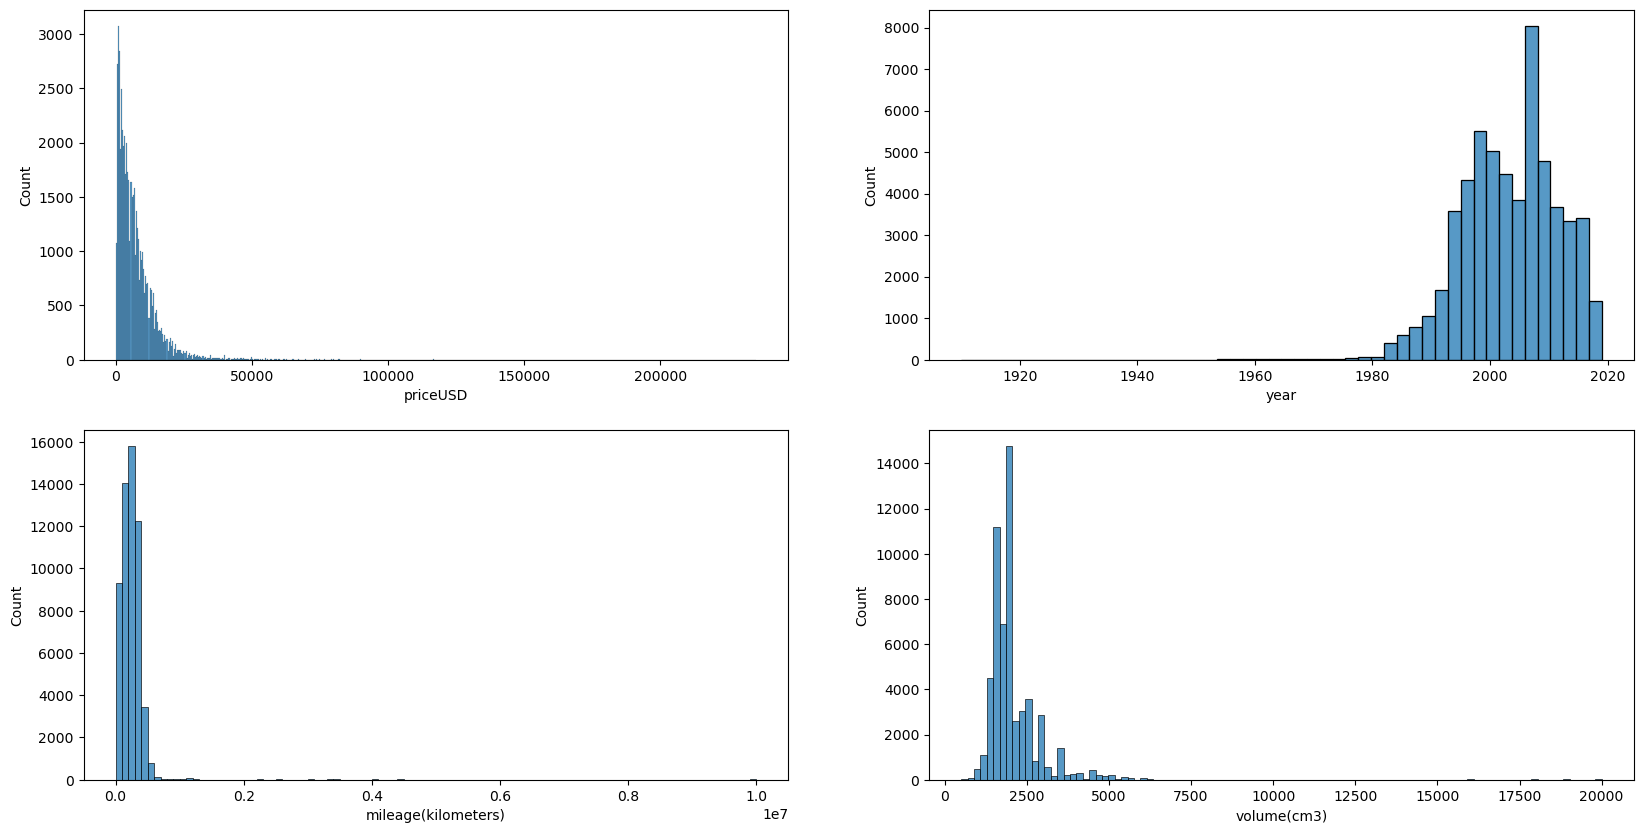

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot(x=cars['priceUSD'],ax=ax[0,0])
sns.histplot(x=cars['year'],ax=ax[0,1],bins=50)
sns.histplot(x=cars['mileage(kilometers)'],ax=ax[1,0], bins = 100)
sns.histplot(x=cars['volume(cm3)'],ax=ax[1,1], bins = 100)

Powyższe wykresy pokazują rozkład danych w zmiennych ciągłych. Większość samochodów została wyprodukowana w latach 1990-2019, ich cena wynosi mniej niż 50 tys. USD, przebieg jest mniejszy niż 1 milion km, a pojemność silnika wynosi od 1750 do 2000 cm3.

Ponieważ większość samochodów wyprodukowano po 1980 roku, będę brać pod uwagę tylko samochody wyprodukowane po 1980 roku.

In [26]:
cars = cars[cars['year']>1980]

### Cena i marka

In [28]:
carsmodf = cars.groupby('make')['priceUSD'].mean().reset_index()
carsmodf = carsmodf.sort_values(by='priceUSD', ascending=False).head(10)
carsmodf.head()

,make,priceUSD
6,bentley,137355.666667
53,mclaren,121500.000000
4,aston-martin,95000.000000
86,tesla,74635.500000
51,maserati,40640.000000


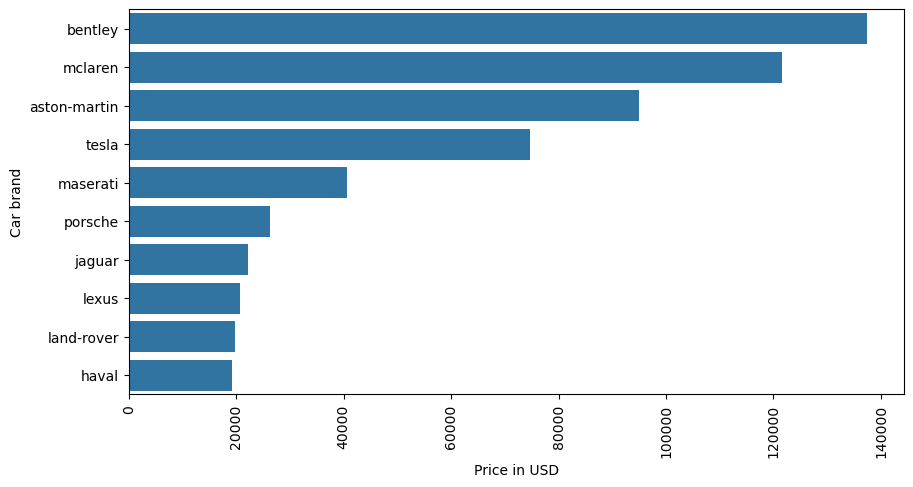

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(y='make',x='priceUSD',data=carsmodf)
plt.xticks(rotation=90)
plt.ylabel('Car brand')
plt.xlabel('Price in USD')
plt.show()

Na wykresie ukazane jest 10 najdrożyszch marek pojazdów. Najdrożesze 5 samochodów to Bentley, Mclaren, Aston-Martin, Tesla i Maserati.

### Cena i stan

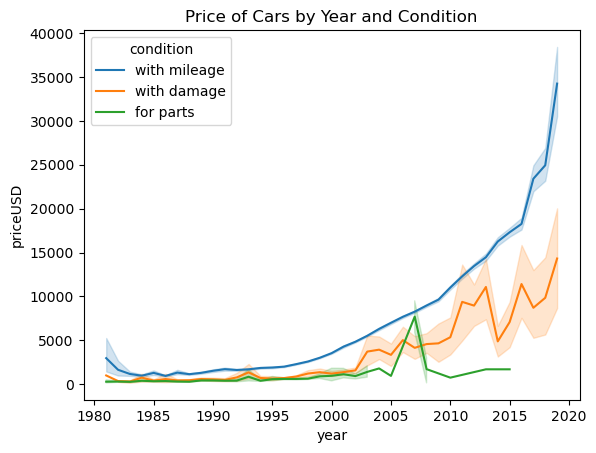

In [32]:
sns.lineplot(x='year',y='priceUSD',data=cars,hue='condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

Ten wykres pokazuje zależność między ceną a rokiem produkcji samochodu, a także stanem sprzedaży samochodu. Samochody sprzedawane w stanie roboczym są droższe,a ich cena rosła z czasem, wykazując wykładniczy wzrost między 2015 a 2020 rokiem. Samochody, które zostały uszkodzone, miały podobną cenę do samochodów, które zostały sprzedane na części w latach 1980–2000. Jednak cena uszkodzonych samochodów wzrosła znacznie po 2000 roku. Samochody, które zostały sprzedane na części, mają tendencję do posiadania minimalnej ceny, a ich cena wzrosła bardzo nieznacznie z czasem.

### Cena i skrzynia biegów

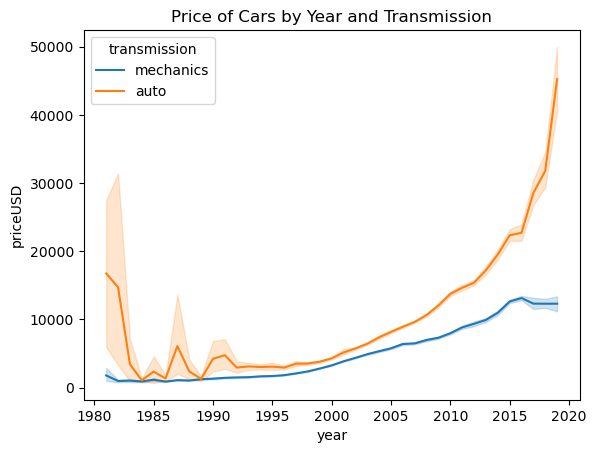

In [35]:
sns.lineplot(x='year',y='priceUSD',data=cars,hue='transmission')
plt.title('Price of Cars by Year and Transmission')
plt.show()

Ten wykres pokazuje zależność między ceną, rokiem produkcji samochodu, a także skrzynią biegów. Cena samochodów z automatyczną skrzynią biegów znacznie spadła po 1983 r., jednak ich cena wzrosła wykładniczo po 2000 r. Jednak cena samochodów z manualną skrzynią biegów jest zawsze niższa niż cena samochodów z automatyczną skrzynią biegów, które wykazują podobny wzrost ceny po 2000 r.

### Cena i rodzaj paliwa

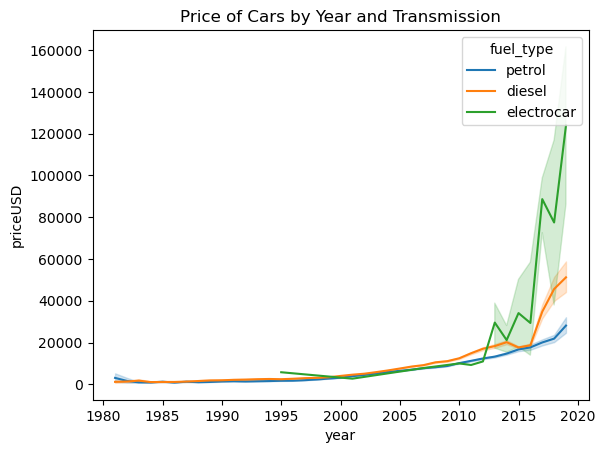

In [38]:
sns.lineplot(x='year',y='priceUSD',data=cars,hue='fuel_type')
plt.title('Price of Cars by Year and Transmission')
plt.show()

Ten wykres pokazuje zależność między ceną, rokiem produkcji samochodu, a także rodzajem paliwa. Do roku 2012 nie było znaczącej róznicy w cenie. Po roku 2012 ceny poszły do góry. Samochody elektyczne, które ukazały się po roku 1995, stały się najdroższe, następnie samochody zasilane olejem napędowym, a na najtańsze są samochody zasilane benzyną. 

### Cena i jednostka napędowa

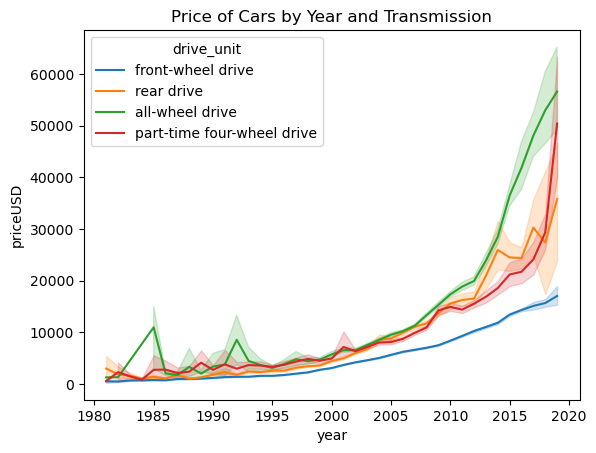

In [41]:
sns.lineplot(x='year',y='priceUSD',data=cars,hue='drive_unit')
plt.title('Price of Cars by Year and Transmission')
plt.show()

W latach 1980–1995 nie było dużej różnicy w cenie samochodów w zależności od jednostki napędowej. Jednak po 1995 r. cena samochodów z napędem na przednie koła wzrosła w wolniejszym tempie w porównaniu z innymi jednostkami napędowymi. Cena samochodów z napędem na wszystkie koła znacznie wzrosła po 2005 r., osiągając najwyższą cenę wśród wszystkich jednostek napędowych, a następnie z napędem na cztery koła i napędem na tylne koła.

### Cena i segment marki

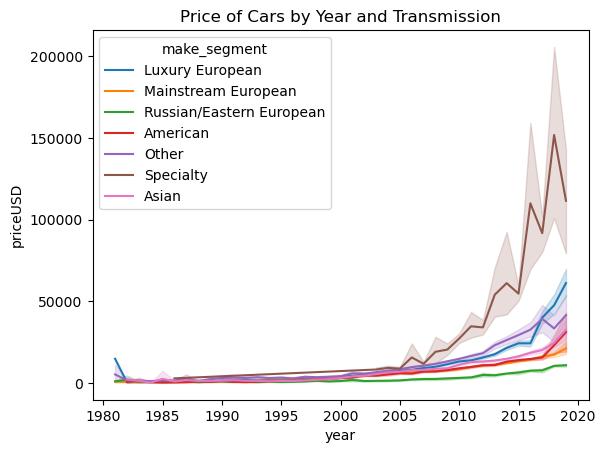

In [44]:
sns.lineplot(x='year',y='priceUSD',data=cars,hue='make_segment')
plt.title('Price of Cars by Year and Transmission')
plt.show()

Wykres przedstawia zależność między ceną, rokiem produkcji samochodu, a segmentem marki. Do roku 2005 nie było dużych różnic w cenie pomiędzy różnymi segmentami marki. Po roku 2005 ceną zaczęłą rosnąć. Cena segmentu samochodów specjalistycznych wzrosła znacząco, a następnie cena samochodów europejskich luksusowych, segmentu samochodów amerykańskich, azjatyckich i europejskich głównego nurtu. Cena samochodów rosyjskich/wschodnioeuropejskich wzrosła w wolniejszym tempie w porównaniu z innymi segmentami i jest najniższa wśród wszystkich segmentów.

## Data Processing

In [47]:
cars.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [48]:
cars.dropna(inplace=True)

In [49]:
cars.drop('make',axis=1, inplace=True)
cars.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [50]:
from sklearn.preprocessing import LabelEncoder

cols=['condition','fuel_type','color','transmission','drive_unit','make_segment']
le=LabelEncoder()
for col in cols:
    le.fit(cars[col])
    cars[col]=le.transform(cars[col])
    print(col,cars[col].unique())
    

condition [2 1 0]
fuel_type [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
transmission [1 0]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Macierz korolacji

<Axes: >

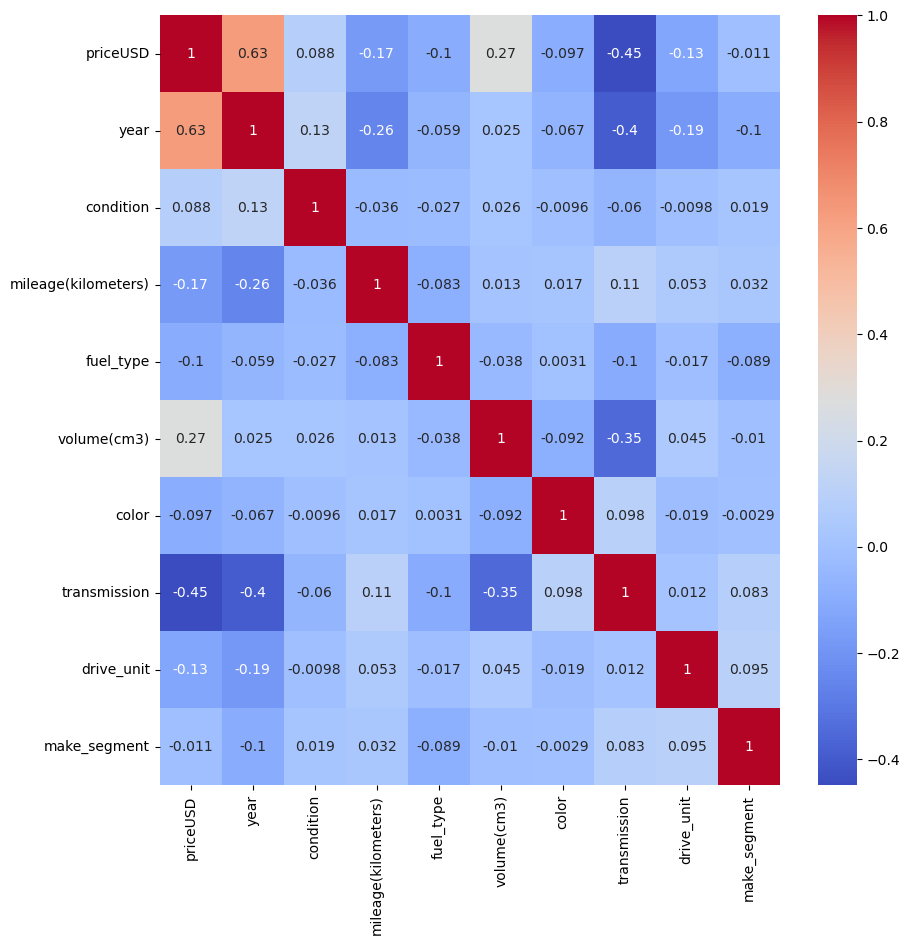

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm')

## Outlier Removal

In [54]:
# Using Z-score to remove outliers
from scipy import stats
z = np.abs(stats.zscore(cars))
threshold = 3

cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

cars = cars[(z < 3).all(axis=1)]

### Train Test Split


In [111]:
from sklearn.model_selection import train_test_split

X=cars.drop('priceUSD',axis=1)
y=cars.priceUSD

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Model Building

## Decision Tree Regressor

In [116]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()


### Hypertuning używając GridSearchCV

In [120]:
from sklearn.model_selection import GridSearchCV
#parameters for grid search
params = {
 'max_depth': [2,4,6,8],
 'min_samples_split': [2,4,6,8],
 'min_samples_leaf': [1,2,3,4],
 'max_features': ['sqrt', 'log2', None, 0.5],
 'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)
#fitting the grid search
grid.fit(X_train, y_train)
#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [125]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=0)

In [127]:
#training score
dtr.score(X_train, y_train)

0.8689232243678456

In [133]:
#predicting the test set
y_pred = dtr.predict(X_test)

## Ewaluacja modelu

In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8529954473045238
Mean Squared Error:  4704555.776616746
Mean Absolute Error:  1414.2804910704947
Root Mean Squared Error:  2168.9987959002524


## Znaczenie funkcji

In [139]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.754301
4,volume(cm3),0.200413
3,fuel_type,0.017333
6,transmission,0.010267
8,make_segment,0.009639
7,drive_unit,0.006883
2,mileage(kilometers),0.000872
5,color,0.000292
1,condition,0.000000


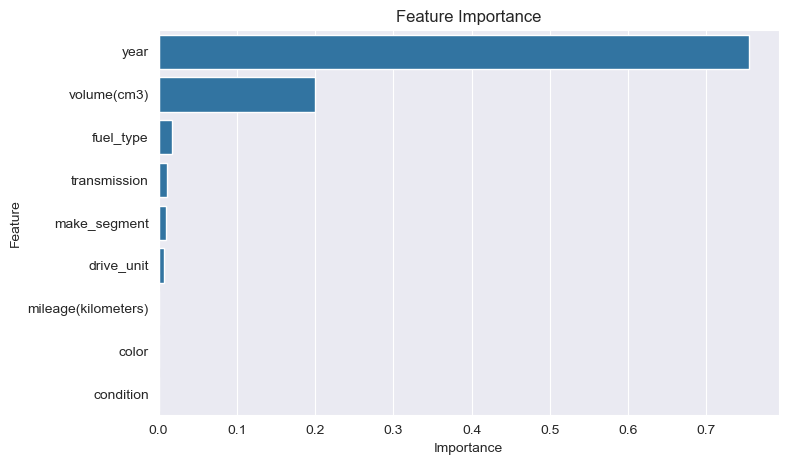

In [149]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance')
plt.show()

## Wnioski

Celem tego projektu było przewidzenie ceny samochodu na Białorusi poprzez analizę cech samochodu, takich jak marka, rok, silnik, rodzaj paliwa, skrzynia biegów, przebieg, jednostka napędowa, kolor i segment. Podczas analizy danych eksploracyjnych stwierdzono, że nastąpił znaczny wzrost cen samochodów na Białorusi po roku 2000. Samochody napędzane benzyną i wyposażone w automatyczną skrzynię biegów mają wyższą cenę w porównaniu do samochodów z silnikiem Diesla i manualną skrzynią biegów. Jednak samochody elektryczne są wyraźnie droższe od innych samochodów. Samochody z napędem na wszystkie koła mają najwyższą cenę spośród wszystkich jednostek napędowych. Samochody z segmentu specjalistycznego mają najwyższą cenę spośród wszystkich segmentów, a następnie luksusowe samochody europejskie, amerykańskie i azjatyckie.

Do przewidzenia ceny samochodu wykorzystano model regresora drzewa decyzyjnego. Model był w stanie przewidzieć cenę samochodu z dokładnością 85,29%. Najważniejszymi cechami do przewidywania ceny samochodu okazały się rok i pojemność silnika.